### Create plots for the results
Use seaborn lineplot 
https://stackabuse.com/seaborn-line-plot-tutorial-and-examples

# Be careful with the order of the algorithms!!! 
#  safeMADDPGsoft, MADDPG, safeMADDPGsoftrewards, safeMADDPGhard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
safe_maddpg_soft = '../data/agents/SafeMADDPG_soft/'
safe_maddpg_hard = '../data/agents/SafeMADDPG_hard/'
maddpg_vanilla   = '../data/agents/MADDPG/'

In [3]:
seed_range = np.arange(5,14)
N = 8000

In [4]:
rewards_soft    = []
rewards_hard    = []
rewards_maddpg = []
rewards_seed=[]
rewards_soft_rewards =[]

collisions_seed=[]
collisions_soft=[]
collisions_hard =[]
collisions_maddpg=[]
collisions_soft_rewards= []
    
infeasibilities_soft = []
infeasibilities_hard = []

In [5]:
import scipy
sigma = 10
for seed in seed_range:
    

    # Import Results
    
    signal_soft=np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')
    signal_soft_gaus = scipy.ndimage.gaussian_filter1d(signal_soft, sigma = sigma)
    
    signal_hard=np.load(safe_maddpg_hard +"seed" + str(seed) + "/" + 'rewards.npy')
    signal_hard_gaus = scipy.ndimage.gaussian_filter1d(signal_hard, sigma = sigma)
    
    signal_vanilla=np.load(maddpg_vanilla +"seed" + str(seed) + "/" + 'rewards.npy')
    signal_vanilla_gaus = scipy.ndimage.gaussian_filter1d(signal_vanilla, sigma = sigma)
    
    #rewards:
    rewards_soft.append(signal_soft_gaus[0:N:10]) #list of arrays
    rewards_hard.append(signal_hard_gaus[0:N:10])
    rewards_maddpg.append(signal_vanilla_gaus[0:N:10])
    #rewards_soft_rewards.append(signal_soft_rew_gaus[0:N:10])
    rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "_new/" + 'collisions.npy')[0:N])
    #collisions_soft_rewards.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "_new/" + 'collisions.npy')[0:N])
    collisions_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "_new/" +'collisions.npy')[0:N])
    collisions_seed.append([seed]*len(collisions_soft[-1]))
    
    
    #infeasibilities:
    infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "_new/" +'infeasible.npy')[0:N])
    infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "_new/" +'infeasible.npy')[0:N])

episodes_list_rew=list(range(0,N, 10))*len(rewards_soft)
episodes_list_col= list(range(0,N))*len(rewards_soft)

In [7]:
infeasibilities_hard_list = [item for sublist in infeasibilities_hard for item in sublist]

In [8]:
#infeasibilities_hard_list 
infeasibilities_mean= [np.mean(ar) for ar in infeasibilities_hard]

In [652]:
infeasibilities_mean

[10.185375,
 10.26075,
 10.61225,
 10.285625,
 10.365125,
 10.69575,
 10.972125,
 10.627,
 10.494375,
 10.447625,
 10.61625]

In [471]:
len(collisions_maddpg)

10

In [ ]:
for seed in seed_range:
    

    # Import Results
    
    
    
    
    
    #rewards:
    rewards_soft.append(np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')[0:N:10]) #list of arrays
    rewards_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/"+'rewards.npy')[0:N:10])
    rewards_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    rewards_soft_rewards.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_soft_rewards.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" +'collisions.npy')[0:N])
    collisions_seed.append([seed]*len(collisions_soft[-1]))
    
    
    #infeasibilities:
    infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])
    infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])

episodes_list_rew=list(range(0,8000, 10))*len(rewards_soft)
episodes_list_col= list(range(0,8000))*len(rewards_soft)

In [9]:
#flatten list
rewards_soft_list = [item for sublist in rewards_soft for item in sublist]
rewards_maddpg_list = [item for sublist in rewards_maddpg for item in sublist]
#rewards_soft_rewards_list=[item for sublist in rewards_soft_rewards for item in sublist]
rewards_hard_list = [item for sublist in rewards_hard for item in sublist]
rewards_seed_list= [item for sublist in rewards_seed for item in sublist]
rewards_type=['soft MADDPG']*len(rewards_soft_list) + ['MADDPG']*len(rewards_maddpg_list)  + ['hard MADDPG']*len(rewards_hard_list)

In [10]:
rewards_df=pd.DataFrame()
rewards_df['type']=rewards_type
rewards_df['seed']=rewards_seed_list*3
rewards_df['Average Reward']=rewards_soft_list + rewards_maddpg_list + rewards_hard_list
rewards_df['Episode']=episodes_list_rew*3 #3 times the same, one for each algorithm

In [11]:
rewards_df

,type,seed,Average Reward,Episode
0,soft MADDPG,5,-674.653457,0
1,soft MADDPG,5,-647.856227,10
2,soft MADDPG,5,-620.624352,20
3,soft MADDPG,5,-621.332021,30
4,soft MADDPG,5,-630.604851,40
...,...,...,...,...
21595,hard MADDPG,13,-68.125924,7950
21596,hard MADDPG,13,-73.670680,7960
21597,hard MADDPG,13,-77.525790,7970
21598,hard MADDPG,13,-73.748678,7980


In [12]:
collisions_soft_list = [item for sublist in collisions_soft for item in sublist]
#collisions_soft_rewards_list = [item for sublist in collisions_soft_rewards for item in sublist]
collisions_maddpg_list = [item for sublist in collisions_maddpg for item in sublist]
collisions_seed_list= [item for sublist in collisions_seed for item in sublist]
collisions_hard_list= [item for sublist in collisions_hard for item in sublist]
collisions_type=['soft MADDPG']*len(collisions_soft_list) + ['MADDPG']*len(collisions_maddpg_list) + ['hard MADDPG']*len(collisions_hard_list)

In [379]:
len(episodes_list_col*4)

352000

In [13]:
collisions_df=pd.DataFrame()
collisions_df['Type']=collisions_type
collisions_df['Seed']=collisions_seed_list*3
collisions_df['Total Collisions']=collisions_soft_list + collisions_maddpg_list + collisions_hard_list
collisions_df['Episode']=episodes_list_col*3

In [14]:
collisions_df_vanilla= collisions_df[(collisions_df['Type']== 'MADDPG')& (collisions_df['Episode']== 7999)]['Total Collisions'].values
rewards_df_vanilla= rewards_df[(rewards_df['type']== 'MADDPG')& (rewards_df['Episode']== 7990)]['Total Reward'].values

collisions_df_hard= collisions_df[(collisions_df['Type']== 'hard MADDPG')& (collisions_df['Episode']== 7999)]['Total Collisions'].values
rewards_df_hard= rewards_df[(rewards_df['type']== 'hard MADDPG')& (rewards_df['Episode']== 7990)]['Total Reward'].values

collisions_df_soft= collisions_df[(collisions_df['Type']== 'soft MADDPG')& (collisions_df['Episode']== 7999)]['Total Collisions'].values
rewards_df_soft= rewards_df[(rewards_df['type']== 'soft MADDPG')& (rewards_df['Episode']== 7990)]['Total Reward'].values

KeyError: 'Total Reward'

In [615]:
collisions_df_vanilla

array([172715, 181337, 174530, 175746, 173347, 173218, 173420, 173819,
       173869, 176819, 172759], dtype=int64)

In [622]:
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [632]:
mean_confidence_interval(collisions_df_soft)

(2296.818181818182, 2221.30921430177, 2372.3271493345937)

### Plot for rewards: 

ValueError: Could not interpret value `Total Reward` for parameter `y`

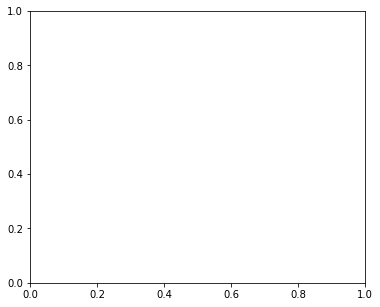

In [15]:
#sigma = 1
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Total Reward",hue='type', data = rewards_df, ax = ax)
ax.get_legend().set_title(title = '')
plt.show()

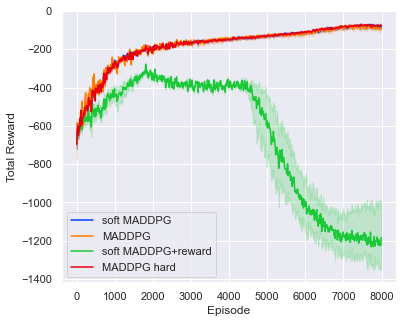

In [479]:
#sigma = 5
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Total Reward",hue='type', data = rewards_df, ax = ax, ci = 99)
ax.get_legend().set_title(title = '')
plt.show()

In [ ]:
#sigma = 10
sns.color_palette("Paired")
sns.set_style("darkgrid")
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Average Reward",hue='type', data = rewards_df, ax = ax, hue_order=['MADDPG', 'hard MADDPG', 'soft MADDPG'])
ax.get_legend().set_title(title = '')
plt.savefig('rewards.pdf')
plt.show()

In [544]:
rewards_df

,type,seed,Total Reward,Episode
0,soft MADDPG,6,-646.101478,0
1,soft MADDPG,6,-637.648927,10
2,soft MADDPG,6,-621.244227,20
3,soft MADDPG,6,-611.094457,30
4,soft MADDPG,6,-612.128745,40
...,...,...,...,...
3195,MADDPG hard,6,-82.373989,7950
3196,MADDPG hard,6,-80.913335,7960
3197,MADDPG hard,6,-81.293354,7970
3198,MADDPG hard,6,-83.236329,7980


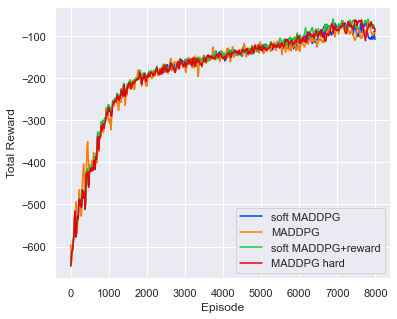

In [550]:
# sigma = 10
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Total Reward",hue='type', data = rewards_df, ax = ax )
ax.get_legend().set_title(title = '')
plt.show()

### Plot for collisions:

### Plot showing all 4 different procedures used.

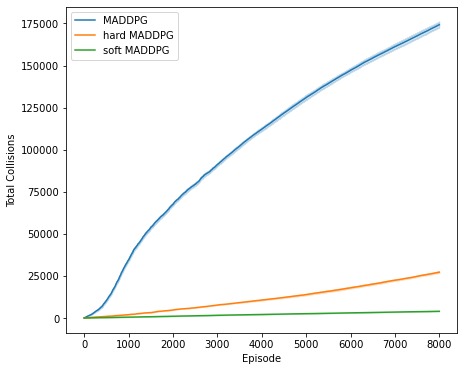

In [17]:
fig_dims = (7,6)
sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=fig_dims)
figure = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', data = collisions_df, ax= ax, hue_order=['MADDPG', 'hard MADDPG', 'soft MADDPG'])
#handles, labels = figure.get_legend_handles_labels()
#figure.legend(handles=handles[1:])
#figure.legend(handles=handles[1:], labels=labels[0:]) #to remove type from the legend
ax.get_legend().set_title(title = '')
plt.savefig('collisions.pdf')
plt.show()

### Plot comparing only the soft constraint procedures.

In [19]:
collisions_soft_df=collisions_df[(collisions_df['Type']!= 'MADDPG') & (collisions_df['Type']!= 'hard MADDPG')]

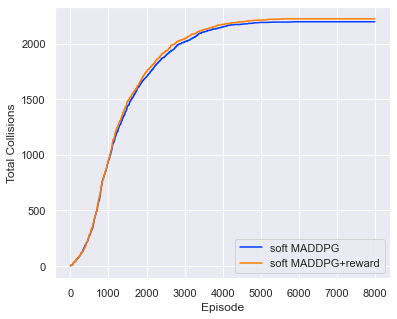

In [542]:
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
figure3 = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type',palette = 'bright', data = collisions_soft_df, ax = ax)
#handles, labels = figure3.get_legend_handles_labels()
#figure3.legend(handles=handles[1:], labels=labels[1:])
ax.get_legend().set_title(title = '')
#figure3.savefig("collisions_soft.pdf")
plt.show()

### Create a barplot with average collisions per episode

### Return the cumsum to original observations:

In [584]:
def return_obs(df,seed):
    col = df[df['Seed']==seed]['Total Collisions'].values
    col_shifted= np.insert(np.delete(col, -1), 0, 0)
    return list(col-col_shifted)

In [585]:
collisions_df

,Type,Seed,Total Collisions,Episode
0,soft MADDPG,5,0,0
1,soft MADDPG,5,0,1
2,soft MADDPG,5,0,2
3,soft MADDPG,5,0,3
4,soft MADDPG,5,1,4
...,...,...,...,...
263995,hard MADDPG,15,69475,7995
263996,hard MADDPG,15,69475,7996
263997,hard MADDPG,15,69475,7997
263998,hard MADDPG,15,69475,7998


In [586]:
observed_col=[]
for alg in ['soft MADDPG','MADDPG','hard MADDPG']:
    df = collisions_df[collisions_df['Type']== alg]
    for seed in seed_range:
        observed_col.append(return_obs(df=df,seed=seed))         

In [587]:
observed_col_list = [item for sublist in observed_col for item in sublist]

In [588]:
collisions_df['Observed Collisions per Episode']=observed_col_list

In [593]:
collisions_soft_df=collisions_df[(collisions_df['Type']== 'soft MADDPG')] 
#run again to have the observation column 

### Barplot for the mean of collisions per episode only for the soft procedures

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

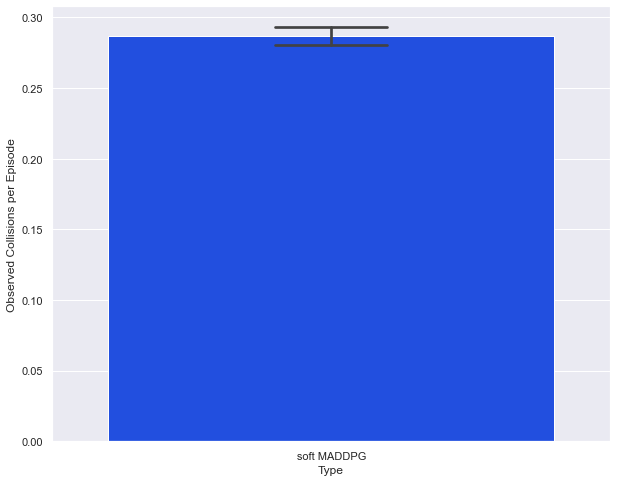

In [594]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_soft_df , capsize=.2, ax=ax)

### Barplot for median collisions per episode for all 4 algorithms

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

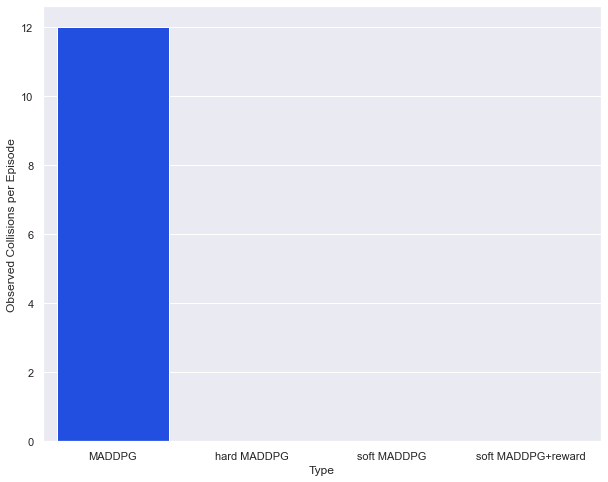

In [428]:
from numpy import median
#sns.set_theme(style="whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_df, ax = ax, estimator=median, order=["MADDPG", "hard MADDPG", 'soft MADDPG', 'soft MADDPG+reward'])

### Barplot for average collisions per episode for all 4 algorithms (now used the mean instead of median)

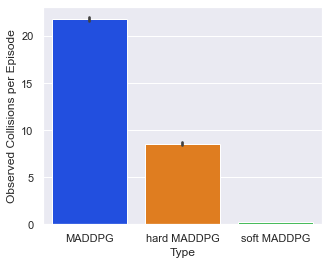

In [590]:
#sns.set_theme(style="whitegrid")
fig_dims = (5, 4)
sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=fig_dims)
#sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_df, ax=ax, order=["MADDPG", "hard MADDPG", 'soft MADDPG'])
plt.savefig('collisions_boxplot.pdf')
plt.show()

In [660]:
#out of 8000 how many episodes had zero collisions
zeroes=[]
for seed in seed_range:
    col =collisions_df[(collisions_df['Type']=='soft MADDPG') & (collisions_df['Seed']==seed) ]['Observed Collisions per Episode'].values
    zeroes.append(len((np.where(col==0)[0])))

In [668]:
zeroes_perc=[1-z/8000 for z in zeroes]

In [669]:
zeroes_perc

[0.13624999999999998,
 0.13137500000000002,
 0.141625,
 0.12687499999999996,
 0.13312500000000005,
 0.13,
 0.13575000000000004,
 0.135,
 0.135,
 0.13637500000000002,
 0.14200000000000002]

In [670]:
mean_confidence_interval(zeroes_perc)

(0.13485227272727274, 0.13181544224150057, 0.1378891032130449)

### Also try with boxplot: 

### Results after testing 

In [595]:
collisions_soft_test=[]
collisions_soft_rewards_test=[]
collisions_hard_test = []
collisions_maddpg_test = []
collisions_seed_test = []

for seed in seed_range:
    

    # Import Results
    #rewards:
    #rewards_soft.append(np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')[0:N:10]) #list of arrays
    #rewards_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/"+'rewards.npy')[0:N:10])
    #rewards_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    #rewards_soft_rewards.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    #rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft_test.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" + 'test_collisions.npy')[0:N])
    #collisions_soft_rewards_test.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'test_collisions.npy')[0:N])
    collisions_hard_test.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" + 'test_collisions.npy')[0:N])
    collisions_maddpg_test.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" +'test_collisions.npy')[0:N])
    collisions_seed_test.append([seed]*len(collisions_soft_test[-1]))
    
    
    #infeasibilities:
    #infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])
    #infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])

#episodes_list_rew=list(range(0,8000, 10))*len(rewards_soft)
episodes_list_col_test= list(range(0,100))*len(collisions_soft_test)

In [323]:
len(collisions_soft_test[0])

8000

In [596]:
collisions_soft_list_test = [item for sublist in collisions_soft_test for item in sublist]
collisions_soft_rewards_list_test = [item for sublist in collisions_soft_rewards_test for item in sublist]
collisions_maddpg_list_test = [item for sublist in collisions_maddpg_test for item in sublist]
collisions_seed_list_test= [item for sublist in collisions_seed_test for item in sublist]
collisions_hard_list_test= [item for sublist in collisions_hard_test for item in sublist]
collisions_type_test=['soft MADDPG']*len(collisions_soft_list_test) + ['MADDPG']*len(collisions_maddpg_list_test) + ['hard MADDPG']*len(collisions_hard_list_test)

In [597]:
collisions_df_test=pd.DataFrame()
collisions_df_test['Type']=collisions_type_test
collisions_df_test['Seed']=collisions_seed_list_test*3
collisions_df_test['Collisions per Episode']=collisions_soft_list_test + collisions_maddpg_list_test + collisions_soft_rewards_list_test+ collisions_hard_list_test
collisions_df_test['Episode']=episodes_list_col_test*3

In [599]:
collisions_df_test['Collisions per Episode'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [600]:
sum(collisions_df_test[collisions_df_test['Type']=='MADDPG']['Collisions per Episode'].values)

15252

In [601]:
cumsum=[]
for alg in ['soft MADDPG','MADDPG', 'hard MADDPG']:
    df = collisions_df_test[collisions_df_test['Type']== alg]
    for seed in seed_range:
        cumsum.append(list(df[df['Seed']==seed]['Collisions per Episode'].cumsum().values))         

In [459]:
#cumsum[0]

In [602]:
cumsum_list = [item for sublist in cumsum for item in sublist]
collisions_df_test['Total Collisions']= cumsum_list

In [603]:
collisions_df_test

,Type,Seed,Collisions per Episode,Episode,Total Collisions
0,soft MADDPG,5,0,0,0
1,soft MADDPG,5,0,1,0
2,soft MADDPG,5,0,2,0
3,soft MADDPG,5,0,3,0
4,soft MADDPG,5,0,4,0
...,...,...,...,...,...
3295,hard MADDPG,15,0,95,0
3296,hard MADDPG,15,0,96,0
3297,hard MADDPG,15,0,97,0
3298,hard MADDPG,15,0,98,0


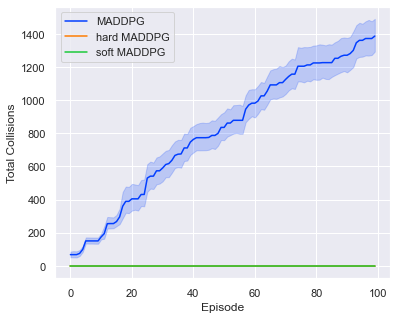

In [604]:
fig_dims = (6,5)
sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=fig_dims)
figure = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', data = collisions_df_test, ax= ax,hue_order=['MADDPG', 'hard MADDPG', 'soft MADDPG'])
#handles, labels = figure.get_legend_handles_labels()
#figure.legend(handles=handles[1:])
#figure.legend(handles=handles[1:], labels=labels[0:]) #to remove type from the legend
ax.get_legend().set_title(title = '')
plt.savefig('collisions_test.pdf')
plt.show()

In [464]:
collisions_df_test

,Type,Seed,Collisions per Episode,Episode,Total Collisions
0,soft MADDPG,5,0,0,0
1,soft MADDPG,5,0,1,0
2,soft MADDPG,5,0,2,0
3,soft MADDPG,5,0,3,0
4,soft MADDPG,5,0,4,0
...,...,...,...,...,...
4395,hard MADDPG,15,0,95,0
4396,hard MADDPG,15,0,96,0
4397,hard MADDPG,15,0,97,0
4398,hard MADDPG,15,0,98,0


<AxesSubplot:xlabel='Type', ylabel='Collisions per Episode'>

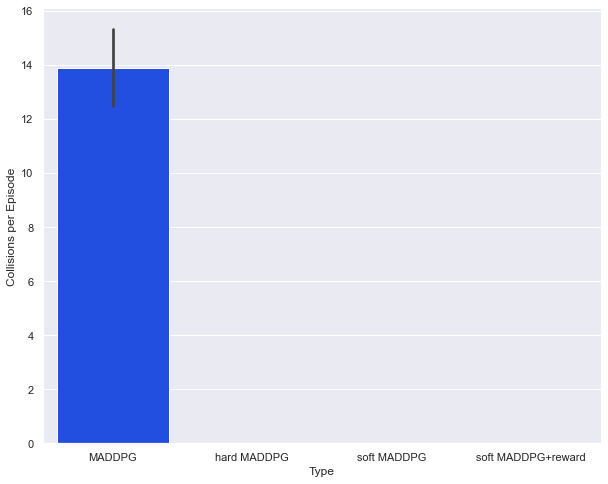

In [465]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Collisions per Episode', data = collisions_df_test, ax=ax, order=["MADDPG", "hard MADDPG", 'soft MADDPG', 'soft MADDPG+reward'])

In [633]:
collisions_df_test

,Type,Seed,Collisions per Episode,Episode,Total Collisions
0,soft MADDPG,5,0,0,0
1,soft MADDPG,5,0,1,0
2,soft MADDPG,5,0,2,0
3,soft MADDPG,5,0,3,0
4,soft MADDPG,5,0,4,0
...,...,...,...,...,...
3295,hard MADDPG,15,0,95,0
3296,hard MADDPG,15,0,96,0
3297,hard MADDPG,15,0,97,0
3298,hard MADDPG,15,0,98,0


In [635]:
collisions_test_vanilla = collisions_df_test[(collisions_df_test['Type']=='MADDPG') & (collisions_df_test['Episode']==99)]['Total Collisions'].values

In [636]:
mean_confidence_interval(collisions_test_vanilla)

(1386.5454545454545, 1263.987003906806, 1509.103905184103)

In [672]:
infeas_num=[]
for i in range(11):
    infeas_num.append(len(np.where(infeasibilities_hard[i]!=0)[0]))

In [675]:
infeas_num_perc=[z/8000 for z in infeas_num]

In [676]:
infeas_num_perc

[0.3895,
 0.387,
 0.391125,
 0.3865,
 0.38925,
 0.39425,
 0.399875,
 0.39175,
 0.39575,
 0.392375,
 0.39875]

In [674]:
mean_confidence_interval(infeas_num)

(3139.0, 3115.255561900349, 3162.744438099651)

In [677]:
mean_confidence_interval(infeas_num_perc)

(0.392375, 0.3894069452375436, 0.39534305476245635)